In [1]:
# here we demonstrate how to calculate the mean value of a function g(x) w.r.t pdf f(x) through 3 different methods
# 1) numerical integration
# 2) direct Monte Carlo from f(x)
# 3) weighted Monte Carlo from different pdf h(x)
#
# here we use g(x) as gaussian kernel
# f(x) is a truncated pareto pdf with k=3 
# and h(x) is also a truncated pareto pdf but with different k=-1

In [2]:
import numpy as np
from simulator.pareto_sampler import pareto as truncated_pareto

np.random.seed(0)

xmin = 1.
xmax = 10.

k=3
kw = 0.1

tp = truncated_pareto(k, xmin, xmax)
tpw = truncated_pareto(kw, xmin, xmax)

def g(x):
    x0 = 5
    sigma_sq = 1**2
    return np.exp(-1./2. * (x-x0)**2/sigma_sq)

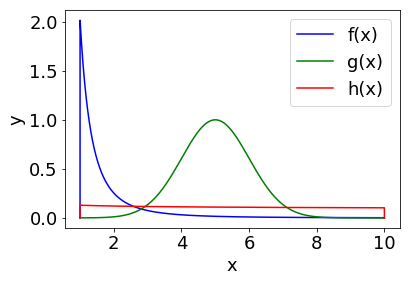

In [7]:
# visualize functions
import matplotlib.pyplot as plt

x_pts = np.linspace(xmin, xmax, 10000)
yf_pts = tp.pdf(x_pts)
yg_pts = g(x_pts)
yh_pts = tpw.pdf(x_pts)

plt.plot(x_pts, yf_pts, 'b-', label="f(x)")
plt.plot(x_pts, yg_pts, 'g-', label="g(x)")
plt.plot(x_pts, yh_pts, 'r-', label="h(x)")
plt.legend(fontsize=18)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.tick_params(labelsize=18)
plt.show()

In [4]:
# estimate average through numerical integration
from scipy.integrate import quad

fint = lambda x: g(x) * tp.pdf(x)
result = quad(fint, xmin, xmax)
print "average of model pdf (integration)", result[0], "pm", result[1]

average of model pdf (integration) 0.0551467467244 pm 3.09596727595e-12


In [5]:
# estimate average through direct sampling (MC) from model pdf
# here we take advantage of the model being a finite mixture of models that are easy to sample from
# (otherwise do inverse cdf, accept reject etc ..)

nsamples = int(1.e3)
samples = tp.sample_pareto(nsamples)

g_samples = g(samples)
result = np.mean(g_samples)

print "average of model pdf (direct simulation)", result

# variance of estimated means from toys
ntoys = int(1.e3)
results = np.zeros(ntoys)
for i in range(ntoys):
    results[i] = np.mean(tp.sample_pareto(nsamples))
    
print "standard error of estimator:", np.sqrt(np.var(results))

average of model pdf (direct simulation) 0.06447151354673225
standard error of estimator: 0.036625290290100705


In [6]:
# estimate average through importance sampling (weighted MC)
# note: in contrast to the previous example ex1 - the weighted MC technique wins out by alot.

nsamples = int(1.e3)
samples = tpw.sample_pareto(nsamples)

g_samples = g(samples)

weights = tp.pdf(samples) / tpw.pdf(samples)
result = np.average(g_samples, weights=weights)

print "average of model pdf (weighted simulation)", result

# variance of estimated means from toys
ntoys = int(1.e3)
results = np.zeros(ntoys)

for i in range(ntoys):
    samples = tpw.sample_pareto(nsamples)
    g_samples = g(samples)
    weights = tp.pdf(samples) / tpw.pdf(samples)
    results[i] = np.average(g_samples, weights=weights)
    
print "standard error of estimator:", np.sqrt(np.var(results))

average of model pdf (weighted simulation) 0.05783950050227129
standard error of estimator: 0.004684648114230026
